Summary:
This assignment uses two AI classification algorithms to classify wine into 3 differnt classes. The two algorithms uses are KNearestNeigbors and logistic regression.
The steps undertaken are as follows:
* Import and load the data.
* Analyze and understand the data by looking for correlations and outputting the shape, min values, max values and average values.
* Split the data into a training and testing set with lables for each. The split used was 80-20.
* Create an instance of KNearestNeigbors and train it with the training data.
* Output performance metrics for KNearestNeigbors (Accuracy, Precision, Recall, F1)
* Create an instance of LogisticRegression and train it with the training data. 
* Output performance metrics for Logistic Regression (Accuracy, Precision, Recall, F1)

CS 455
Dr. Yoshigoe
Assignment 2
Simon Cole, Tyler Mcqueen, and Evan Karim

References:
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron
https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

Imports and loading the data.

In [2]:
import sklearn

import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

from sklearn.datasets import load_wine
data = load_wine(return_X_y=False,as_frame=True)
data.target[[10, 80, 140]]
list(data.target_names)


['class_0', 'class_1', 'class_2']

Printing The minimums, maximums, and averages of the features.

In [3]:
print("Minimums of each feature")
for i in data.feature_names:
    minInFeature = min(data.data[i])
    print("min " + i + ": " + str(minInFeature))
    
print("\nMaximums of each feature")
for i in data.feature_names:
    maxInFeature = max(data.data[i])
    print("max " + i + ": " + str(maxInFeature))
    
print("\nAverage value of each feature")
for i in data.feature_names:
    avg = sum(data.data[i]) / len(data.data[i])
    print("avg " + i + ": " + str(avg))

Minimums of each feature
min alcohol: 11.03
min malic_acid: 0.74
min ash: 1.36
min alcalinity_of_ash: 10.6
min magnesium: 70.0
min total_phenols: 0.98
min flavanoids: 0.34
min nonflavanoid_phenols: 0.13
min proanthocyanins: 0.41
min color_intensity: 1.28
min hue: 0.48
min od280/od315_of_diluted_wines: 1.27
min proline: 278.0

Maximums of each feature
max alcohol: 14.83
max malic_acid: 5.8
max ash: 3.23
max alcalinity_of_ash: 30.0
max magnesium: 162.0
max total_phenols: 3.88
max flavanoids: 5.08
max nonflavanoid_phenols: 0.66
max proanthocyanins: 3.58
max color_intensity: 13.0
max hue: 1.71
max od280/od315_of_diluted_wines: 4.0
max proline: 1680.0

Average value of each feature
avg alcohol: 13.000617977528083
avg malic_acid: 2.336348314606741
avg ash: 2.3665168539325854
avg alcalinity_of_ash: 19.49494382022472
avg magnesium: 99.74157303370787
avg total_phenols: 2.295112359550562
avg flavanoids: 2.0292696629213474
avg nonflavanoid_phenols: 0.36185393258426973
avg proanthocyanins: 1.59089

Seeing which features are most strongly correlated with target.

In [4]:
corrMatrix = data.frame.corr()
corrMatrix["target"].sort_values(ascending=False)


target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

Plotting the correlations

array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='malic_acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='ash', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <AxesSubplot:xlabel='magnesium', ylabel='alcohol'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='alcohol'>,
        <AxesSubplot:xlabel='flavanoids', ylabel='alcohol'>,
        <AxesSubplot:xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <AxesSubplot:xlabel='proanthocyanins', ylabel='alcohol'>,
        <AxesSubplot:xlabel='color_intensity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='hue', ylabel='alcohol'>,
        <AxesSubplot:xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <AxesSubplot:xlabel='proline', ylabel='alcohol'>,
        <AxesSubplot:xlabel='target', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>,
        <AxesSubplot:xlabel='malic_acid', ylabel='malic_acid'

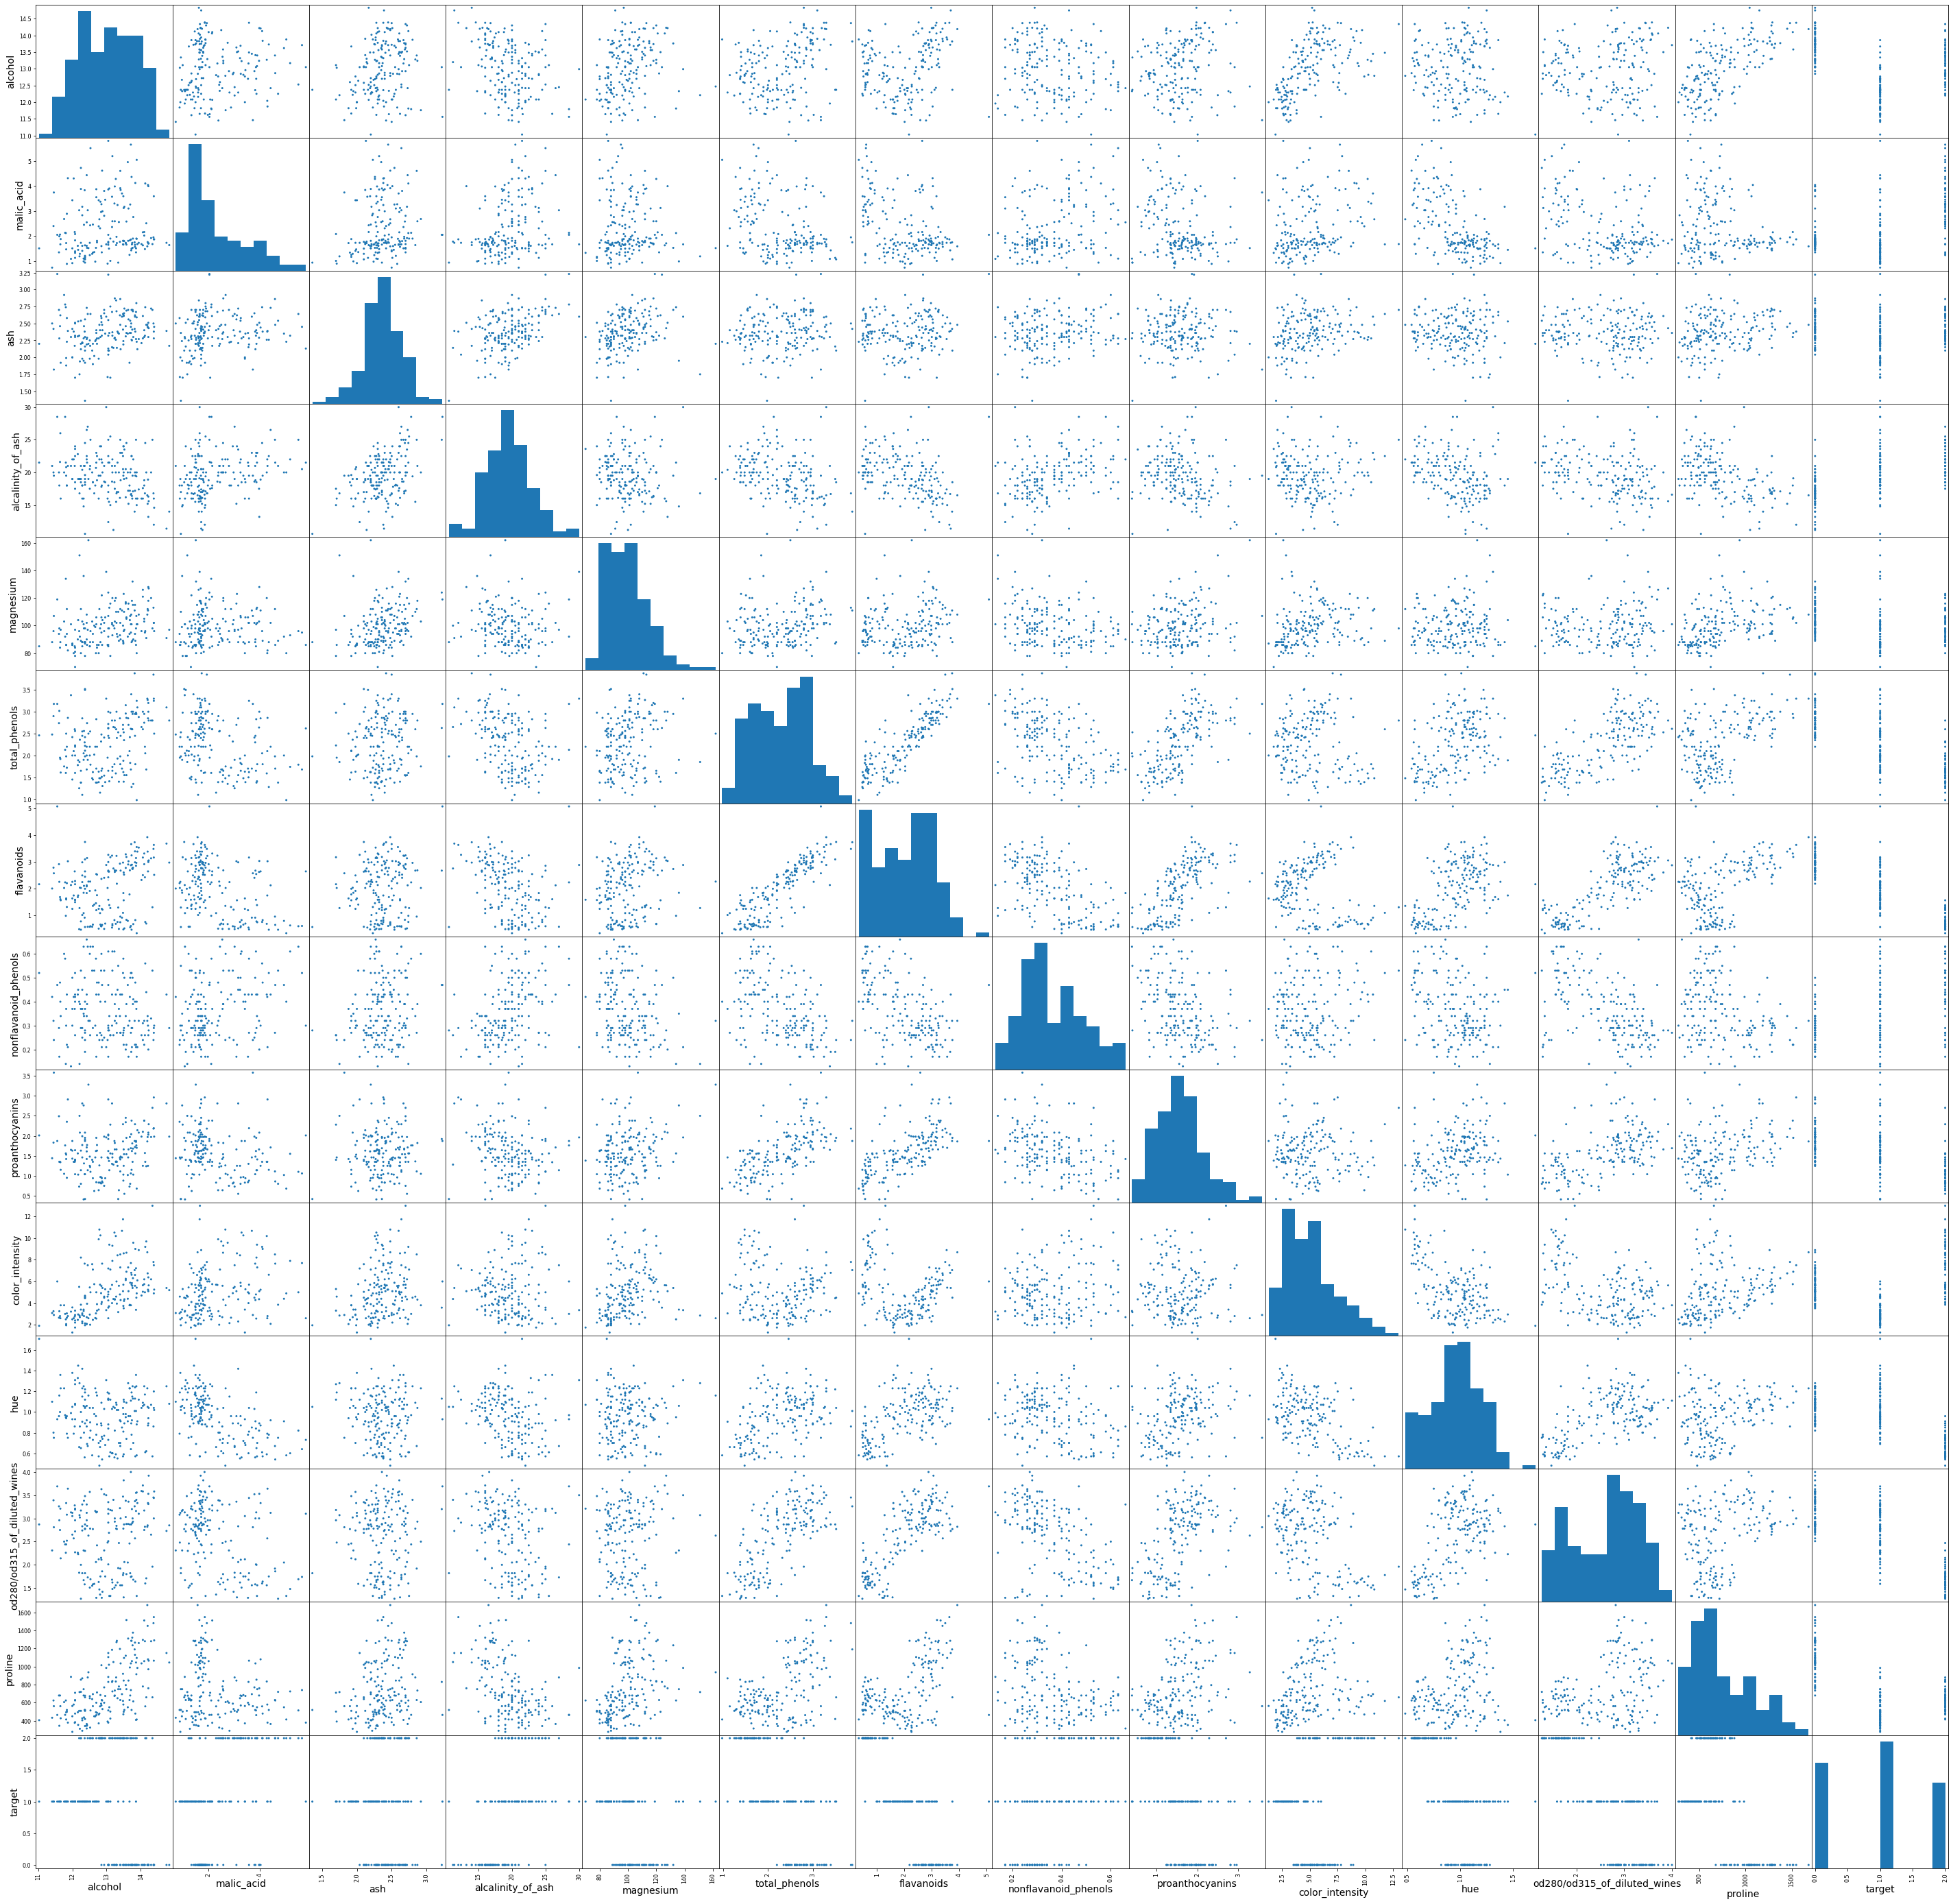

In [5]:
pd.plotting.scatter_matrix(data.frame, 1, [50, 50])


Split the data for training and testing.

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

19     0
45     0
140    2
30     0
67     1
16     0
119    1
174    2
109    1
141    2
24     0
150    2
41     0
118    1
15     0
111    1
113    1
82     1
9      0
114    1
18     0
66     1
60     1
169    2
171    2
164    2
117    1
65     1
90     1
55     0
29     0
128    1
145    2
31     0
12     0
42     0
Name: target, dtype: int64

Standard Scalar

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

Create KNN instance and train it.
Get the predicted targets for the test set.

In [41]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train, y_train)
predicted_targets = nbrs.predict(X_test)

Create confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
#first param target, second nbrs
confusion_matrix(y_test, predicted_targets)

array([[12,  0,  2],
       [ 1, 11,  2],
       [ 1,  1,  6]])

Log performance metrics of the KNN classifier. 

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score
knn_accuracy = nbrs.score(X_test, y_test)
knn_precision = precision_score(y_test, predicted_targets, average='micro')
knn_recall = recall_score(y_test, predicted_targets, average='micro')
knn_f1 = f1_score(y_test, predicted_targets, average='micro')

print("accuracy: " + str(knn_accuracy) + "\nprecision: " + str(knn_precision) + "\nrecall: "
      + str(knn_recall) + "\nf1: " + str(knn_f1))

accuracy: 0.8055555555555556
precision: 0.8055555555555556
recall: 0.8055555555555556
f1: 0.8055555555555556


Create instance of Logistic Regression classifier and train it.
Get predictions for the test set.

In [70]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
logistic_predictions = clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Log performance metrics of the logistic regression classifier.

In [83]:
logistic_accuracy = clf.score(X_test, y_test)
logistic_precision = precision_score(y_test, logistic_predictions, average='micro')
logistic_recall = recall_score(y_test, logistic_predictions, average='micro')
logistic_f1 = f1_score(y_test, logistic_predictions, average='micro')

print("accuracy: " + str(logistic_accuracy) + "\nprecision: " + str(logistic_precision) + "\nrecall: "
      + str(logistic_recall) + "\nf1: " + str(logistic_f1))



accuracy: 0.9722222222222222
precision: 0.9722222222222222
recall: 0.9722222222222222
f1: 0.9722222222222222
